In [215]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression as lr
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('files/train.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [64]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,4.590117e-02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,5.969364e-02
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,1.609039e-02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,2.738190e-02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,5.047989e-02
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,1.290774e+01


In [4]:
test = pd.read_csv('files/test.csv')
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [7]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [25]:
df['distance'] = abs(df['pickup_longitude'] - df['dropoff_longitude']) + abs(df['pickup_latitude'] - df['dropoff_latitude'])
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.019859
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0.026478
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0.080158
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.015480
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.010818


In [30]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,0.018063
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,0.079929
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,0.106731
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,0.015491
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198,0.015564


In [193]:
dff = df.drop(['id'], axis=1)
dff['pickup_datetime'] = pd.to_datetime(dff['pickup_datetime'])
dff['dropoff_datetime'] = pd.to_datetime(dff['dropoff_datetime'])


In [169]:
dff.dtypes

vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
distance                     float64
dtype: object

In [194]:
dff['hour'] = dff['pickup_datetime'].dt.hour
dff['weekday'] = dff['pickup_datetime'].dt.weekday
dff['month'] = dff['pickup_datetime'].dt.month
dff.head()

dff.drop(['pickup_datetime', 'dropoff_datetime'], axis=1, inplace=True)
dff.head()
 

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,hour,weekday,month
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.019859,17,0,3
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0.026478,0,6,6
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0.080158,11,1,1
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.015480,19,2,4
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.010818,13,5,3


In [195]:
dff['store_and_fwd_flag'] = dff['store_and_fwd_flag'].map({'Y': 1, 'N': 0})
dff.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,hour,weekday,month
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0.019859,17,0,3
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0.026478,0,6,6
2,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,0.080158,11,1,1
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,0.015480,19,2,4
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,0.010818,13,5,3


In [191]:
dff.corr()['trip_duration']

vendor_id             0.019833
passenger_count       0.021124
pickup_longitude      0.110344
pickup_latitude      -0.144149
dropoff_longitude     0.071411
dropoff_latitude     -0.123265
store_and_fwd_flag    0.015168
trip_duration         1.000000
distance              0.764181
hour                  0.039107
weekday              -0.027817
month                 0.046488
Name: trip_duration, dtype: float64

In [251]:
cleaned_df = dff.copy() #.drop(['store_and_fwd_flag', 'passenger_count', 'hour', 'weekday', 'year', 'month'], axis=1)
cleaned_df['vendor_id'] -= 1
cleaned_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,hour,weekday,month
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0.019859,17,0,3
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0.026478,0,6,6
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,0.080158,11,1,1
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,0.015480,19,2,4
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,0.010818,13,5,3


In [208]:
dff.corr()['trip_duration']

vendor_id             0.020304
passenger_count       0.008471
pickup_longitude      0.026542
pickup_latitude      -0.029204
dropoff_longitude     0.014678
dropoff_latitude     -0.020677
store_and_fwd_flag    0.001724
trip_duration         1.000000
distance              0.094738
hour                  0.003690
weekday              -0.000708
month                 0.006607
Name: trip_duration, dtype: float64

<Axes: xlabel='trip_duration', ylabel='Count'>

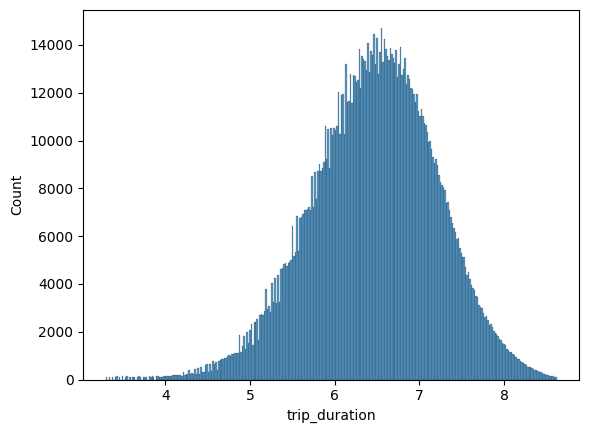

In [252]:
duration = cleaned_df['trip_duration'] 
new_duration = duration.loc[(duration > duration.quantile(0.003)) & (duration < duration.quantile(0.998))]
new_duration.describe()

sns.histplot(np.log(new_duration))

<Axes: xlabel='distance', ylabel='Count'>

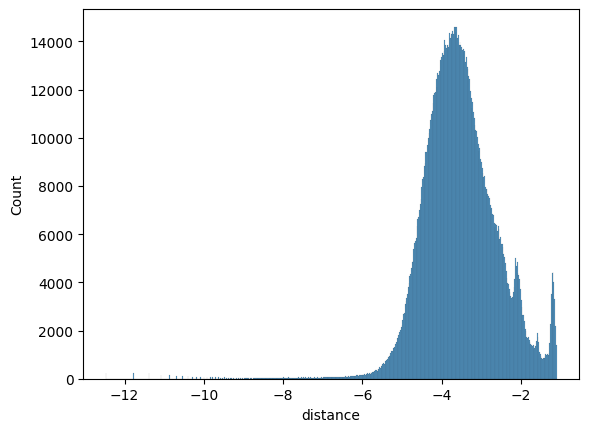

In [253]:
distances = cleaned_df['distance'] 
distances
new_distances = distances.loc[(distances > distances.quantile(0.003)) & (distances < distances.quantile(0.998))]
new_distances.describe()

sns.histplot(np.log(new_distances))

<Axes: xlabel='store_and_fwd_flag', ylabel='Count'>

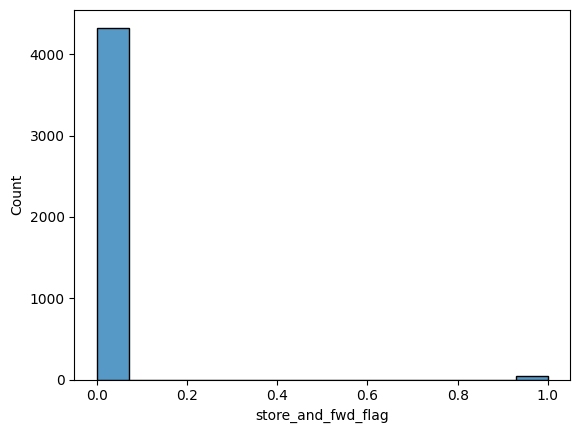

In [263]:
long_long_distance = cleaned_df[cleaned_df['distance'] > cleaned_df['distance'].quantile(0.997)]
sns.histplot(long_long_distance['store_and_fwd_flag'])

<Axes: xlabel='store_and_fwd_flag', ylabel='Count'>

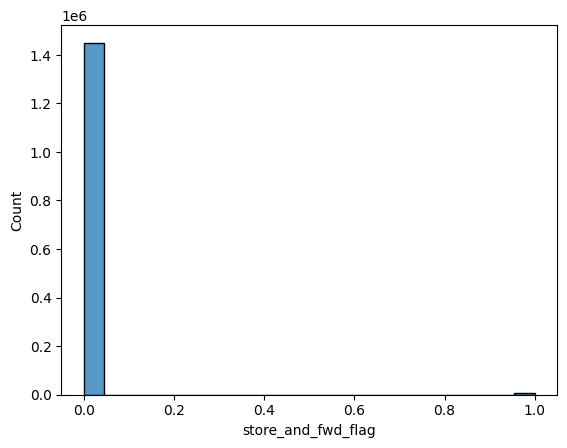

In [264]:
sns.histplot(cleaned_df['store_and_fwd_flag'])

In [209]:
cleaned_df['distance'] = np.log(cleaned_df['distance'])
cleaned_df['trip_duration'] = np.log(cleaned_df['trip_duration'])
cleaned_df.corr()['trip_duration']

c:\Python\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


vendor_id             0.019833
passenger_count       0.021124
pickup_longitude      0.110344
pickup_latitude      -0.144149
dropoff_longitude     0.071411
dropoff_latitude     -0.123265
store_and_fwd_flag    0.015168
trip_duration         1.000000
distance              0.764181
hour                  0.039107
weekday              -0.027817
month                 0.046488
Name: trip_duration, dtype: float64

Text(0.5, 0, 'Distance per weekday')

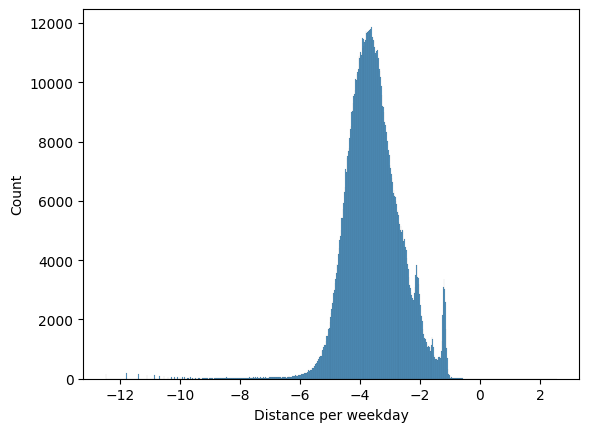

In [248]:
# sns.histplot(cleaned_df['hour'])
weekday_df = cleaned_df[~cleaned_df['weekday'].isin([0, 6])]

distances = weekday_df['distance']

sns.histplot(distances)
plt.xlabel('Distance per weekday')



Text(0.5, 0, 'Distance per Weekend')

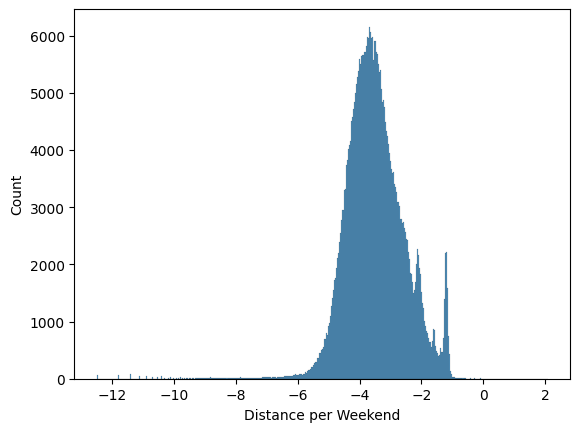

In [249]:
weekend_df = cleaned_df[cleaned_df['weekday'].isin([0, 6])]

distances = weekend_df['distance']

sns.histplot(distances)
plt.xlabel('Distance per Weekend')




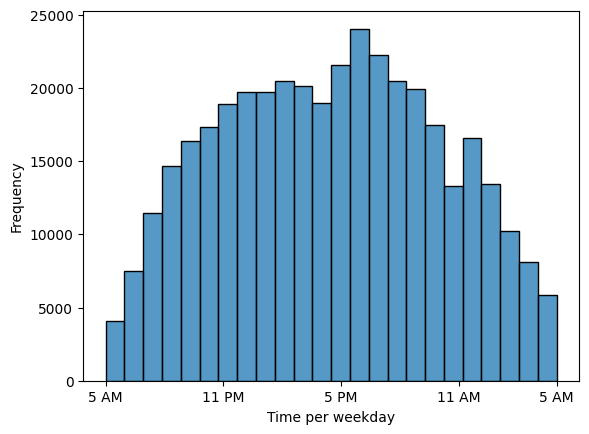

In [246]:
hours = (weekday_df['hour'] - 5) % 24
sns.histplot(hours, bins=24)
plt.xticks(ticks=[0, 6, 12, 18, 23], labels=['5 AM', '11 PM', '5 PM', '11 AM', '5 AM'])
plt.xlabel('Time per weekday')
plt.ylabel('Frequency')

plt.show()

Text(0, 0.5, 'Frequency')

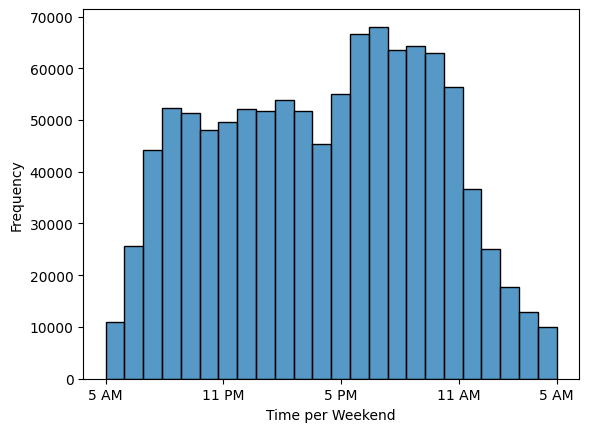

In [247]:
hours = (weekend_df['hour'] - 5) % 24
sns.histplot(hours, bins=24)
plt.xticks(ticks=[0, 6, 12, 18, 23], labels=['5 AM', '11 PM', '5 PM', '11 AM', '5 AM'])
plt.xlabel('Time per Weekend')
plt.ylabel('Frequency')

In [57]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(cleaned_df, dff['trip_duration'], test_size=0.2, random_state=42)

In [73]:
y_train.head()

1053743    1133
273748      887
433988      686
1442481     818
1025834     951
Name: trip_duration, dtype: int64

In [76]:
x_train.drop(['trip_duration'], axis=1, inplace=True)
x_test.drop(['trip_duration'], axis=1, inplace=True)
x_train.head()

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance
1053743,2,-73.862762,40.768822,-73.891701,40.746689,0.051071
273748,2,-73.958038,40.783237,-73.975510,40.760853,0.039856
433988,2,-73.969460,40.785519,-73.989243,40.771748,0.033554
1442481,1,-73.981743,40.736549,-73.998352,40.726440,0.026718
1025834,2,-73.977913,40.752609,-73.975647,40.733139,0.021736


In [77]:
model = lr()
model.fit(x_train, y_train)

LinearRegression()

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
result = model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, result))
rmse

np.float64(3213.653290941751)

In [81]:
cleaned_test = test.drop(['id', 'pickup_datetime', 'passenger_count', 'store_and_fwd_flag'], axis=1)
cleaned_test['distance'] = abs(cleaned_test['pickup_longitude'] - cleaned_test['dropoff_longitude']) + abs(cleaned_test['pickup_latitude'] - cleaned_test['dropoff_latitude'])
cleaned_test.head()

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance
0,1,-73.988129,40.732029,-73.990173,40.756680,0.026695
1,1,-73.964203,40.679993,-73.959808,40.655403,0.028984
2,1,-73.997437,40.737583,-73.986160,40.729523,0.019337
3,2,-73.956070,40.771900,-73.986427,40.730469,0.071789
4,1,-73.970215,40.761475,-73.961510,40.755890,0.014290


In [85]:
answers = model.predict(cleaned_test)
answers

array([ 710.57542095,  877.28989473,  670.69396693, ..., 1352.25165351,
       2640.48518307, 1223.03502495])

In [86]:
sample_submission = pd.read_csv('files/sample_submission.csv')
rmsese = (np.sqrt(mean_squared_error(answers, sample_submission['trip_duration'])))
rmsese

np.float64(254209.07553177094)

In [89]:
outer_df = pd.concat([test['id'], pd.Series(answers)], axis=1)
outer_df.columns = ['id', 'trip_duration']
outer_df.head()

,id,trip_duration
0,id3004672,710.575421
1,id3505355,877.289895
2,id1217141,670.693967
3,id2150126,1254.006605
4,id1598245,589.446302


In [90]:
outer_df.to_csv('files/submission.csv', index=False)